### File for creating "preceding  metrics" plots for predictions using the LSTM model ...
## Europe.

8/5/2025

In [1]:
#relevant import statements
import numpy as np
import math
import pandas as pd
import xarray as xr 
import pickle 
import matplotlib.pyplot as plt

Open and pre-process ellipse metrics. 

In [2]:
##open ellipse metric files
infile = open("../data/ellipse/wind10_redo.p", 'rb') 
wind10 = pickle.load(infile)
infile.close()

infile = open("../data/ellipse/size10_redo.p", 'rb') 
size10 = pickle.load(infile)
infile.close()

infile = open("../data/ellipse/ratio10_redo.p", 'rb') 
rat10 = pickle.load(infile)
infile.close()

infile = open("../data/ellipse/ephi10_redo.p", 'rb') 
ephi10 = pickle.load(infile)
infile.close()

infile = open("../data/ellipse/cenlat10_redo.p", 'rb')
cenlat10 = pickle.load(infile)
infile.close()

infile = open("../data/ellipse/cenlon10_redo.p", 'rb')
cenlon10 = pickle.load(infile)
infile.close()

infile = open("../data/gph/NA_gph_weightedANOM_100.p", 'rb') 
gph = pickle.load(infile)
infile.close()

infile = open("../data/pv/CAP_pvu_weightedANOM.p", 'rb') 
pv = pickle.load(infile)
infile.close()

In [3]:
wind10.shape

(63, 183)

In [4]:
#remove leap year
##CHANGE IF NOT EXTENDED DATAQ BACK TO 120
wind10 = np.delete(wind10[:62],[151],1)
rat10 = np.delete(rat10[:62],[151],1)
cenlat10 = np.delete(cenlat10[:62],[151],1)
cenlon10 = np.delete(cenlon10[:62],[151],1)
size10 = np.delete(size10[:62],[151],1)
ephi10 = np.delete(ephi10[:62],[151],1)

In [5]:
wind10.shape

(62, 182)

In [6]:
shift = 14
#this is used to change the start date from October 19 to November 2nd... and just reduce the overall time observed.
#0 if no change. 

idx = 135

In [7]:
wind10 = wind10[:,19+shift:168]
rat10 = rat10[:,19+shift:168]
cenlat10 = cenlat10[:,19+shift:168]
cenlon10 = cenlon10[:,19+shift:168]
size10 = size10[:,19+shift:168]
ephi10 = ephi10[:,19+shift:168]
gph = gph[:62,19+shift:168]
pv = pv[:62,19+shift:168]

In [8]:
wind10.shape

(62, 135)

In [9]:
#remove NaNs
##CHANGE IF NOT EXTENDED DATA
test_comp = []
indices = np.isnan(wind10)
for i in range(0,62):
    for j in range(0,idx):
        if indices[i,j] != False:
            print(i)
            print(j)
            print("True")
            wind10[i,j] = 0
            rat10[i,j] = 0
            cenlat10[i,j] = 0
            cenlon10[i,j] = 0
            size10[i,j] = 0
            ephi10[i,j] = 0
            if i >= 57:
                test_comp.append((i,j))
            else:
                continue

6
124
True
13
112
True
17
71
True
18
95
True
19
127
True
19
128
True
19
129
True
24
127
True
24
128
True
24
129
True
24
130
True
24
131
True
24
132
True
24
133
True
24
134
True
27
109
True
27
110
True
27
111
True
27
112
True
27
113
True
27
114
True
27
115
True
28
133
True
28
134
True
29
118
True
29
127
True
29
128
True
29
129
True
29
130
True
29
131
True
29
132
True
29
133
True
29
134
True
36
132
True
39
121
True
39
122
True
39
123
True
39
124
True
39
125
True
39
126
True
39
127
True
39
128
True
39
129
True
39
130
True
39
131
True
39
132
True
39
133
True
39
134
True
41
107
True
41
108
True
41
109
True
41
110
True
41
111
True
41
112
True
41
113
True
48
134
True
49
89
True
49
94
True
49
95
True
49
96
True
49
97
True
49
98
True
49
99
True
49
100
True
49
101
True
49
102
True
49
103
True
49
104
True
49
105
True
49
106
True
49
107
True
49
108
True
49
109
True
49
110
True
49
111
True
49
112
True
49
113
True
49
114
True
49
115
True
49
116
True
49
117
True
49
118
True
56
134
True
58
114
True


In [10]:
input = np.empty((62,idx,8))

In [11]:
def daily_anomaly(target):
    dailymean = np.nanmean(target,axis=1)
    anom = np.zeros_like(target)
    for t in np.arange(target.shape[1]):
         anom[:,t] = target[:,t] - dailymean
    print(anom.shape)
    return anom; 

In [12]:
input[:,:,0] = daily_anomaly(wind10[:,:])
input[:,:,1] = daily_anomaly(rat10[:,:])
input[:,:,2] = daily_anomaly(cenlat10[:,:])
input[:,:,3] = daily_anomaly(cenlon10[:,:])
input[:,:,4] = daily_anomaly(size10[:,:])
input[:,:,5] = daily_anomaly(ephi10[:,:])
input[:,:,6] = daily_anomaly(gph[:,:])
input[:,:,7] = daily_anomaly(pv[:,:])

(62, 135)
(62, 135)
(62, 135)
(62, 135)
(62, 135)
(62, 135)
(62, 135)
(62, 135)


In [13]:
input2 = np.empty((62,idx,4))

In [14]:
input2[:,:,2] = daily_anomaly(cenlat10[:62,:])
input2[:,:,1] = daily_anomaly(size10[:62,:])
input2[:,:,3] = daily_anomaly(wind10[:62,:])
input2[:,:,0] = daily_anomaly(gph[:62,:])

(62, 135)
(62, 135)
(62, 135)
(62, 135)


Now that the assembly is done ... We can plot. lol.

In [15]:
##open indice files
infile = open("posXtest_RF14.p", 'rb') 
posXtest = pickle.load(infile)
infile.close()

infile = open("FposXtest_RF14.p", 'rb') 
FposXtest = pickle.load(infile)
infile.close()

infile = open("negXtest_RF14.p", 'rb') 
negXtest = pickle.load(infile)
infile.close()

infile = open("FnegXtest_RF14.p", 'rb') 
FnegXtest = pickle.load(infile)
infile.close()

### These few cells will be for making box plots instead lol. 

In [16]:
##reduce input to just the testing data
nolag_Xtest = input2[52:,:,:]
nolag_Xtest.shape

####now I wanna make these plots SO ... I am adding an index column on to X_test ... full version. 
ranges = np.array([x for x in range(0,idx*10,1)])
ranges = ranges.reshape(10,idx) 
ranges.shape

(10, 135)

In [17]:
##Correct Positive Events
pos_corr_events = []
pos_corr_num = []
pos_corr_total_events = []

for i in range(0,10):
    for j in range(0,idx):
        #index for the date being observed
        date_index = ranges[i,j]
        ##loop through indexes of positive and correct events
        for k in range(len(posXtest)):
            pos_index = posXtest[k]
            if pos_index == date_index:
                pos_corr_total_events.append(0)
                pos_corr_num.append(0)
                pos_corr_events.extend(nolag_Xtest[i,j,:])

##reshape
pos = np.array(pos_corr_events).reshape((len(pos_corr_num),1,4))
print(pos.shape)
print(len(pos_corr_total_events))
##A LOT OF THE CORRECT POSITIVE EVENTS ARE WITHIN 20 DAYS OF THE START OF THE YEAR

(15917, 1, 4)
15917


In [18]:
##FALSE Positive Events
Fpos_corr_events = []
Fpos_corr_num = []
Fpos_corr_total_events = []

for i in range(0,10):
    for j in range(0,idx):
        #index for the date being observed
        date_index = ranges[i,j]
        ##loop through indexes of positive and correct events
        for k in range(len(FposXtest)):
            pos_index = FposXtest[k]
            if pos_index == date_index:
                Fpos_corr_total_events.append(0)
                Fpos_corr_num.append(0)
                Fpos_corr_events.extend(nolag_Xtest[i,j,:])
##reshape
Fpos = np.array(Fpos_corr_events).reshape((len(Fpos_corr_num),1,4))
print(Fpos.shape)
print(len(Fpos_corr_total_events))

(48, 1, 4)
48


In [19]:
##Correct Negative Events
neg_corr_events = []
neg_corr_num = []
neg_corr_total_events = []

for i in range(0,10):
    for j in range(0,idx):
        #index for the date being observed
        date_index = ranges[i,j]
        ##loop through indexes of positive and correct events
        for k in range(len(negXtest)):
            neg_index = negXtest[k]
            if neg_index == date_index:
                neg_corr_total_events.append(0)
                neg_corr_num.append(0)
                neg_corr_events.extend(nolag_Xtest[i,j,:])
##reshape
neg = np.array(neg_corr_events).reshape((len(neg_corr_num),1,4))
print(neg.shape)
print(len(neg_corr_total_events))

(87, 1, 4)
87


In [20]:
##FALSE Negative Events
Fneg_corr_events = []
Fneg_corr_num = []
Fneg_corr_total_events = []
test = []

for i in range(0,10):
    for j in range(0,idx):
        #index for the date being observed
        date_index = ranges[i,j]
        ##loop through indexes of positive and correct events
        for k in range(len(FnegXtest)):
            neg_index = FnegXtest[k]
            if neg_index == date_index:
                Fneg_corr_total_events.append(0)
                Fneg_corr_num.append(0)
                Fneg_corr_events.extend(nolag_Xtest[i,j,:])
                test.append((i,j))
                

##reshape
Fneg = np.array(Fneg_corr_events).reshape((len(Fneg_corr_num),1,4))
print(Fneg.shape)
print(len(Fneg_corr_total_events))

(10935, 1, 4)
10935


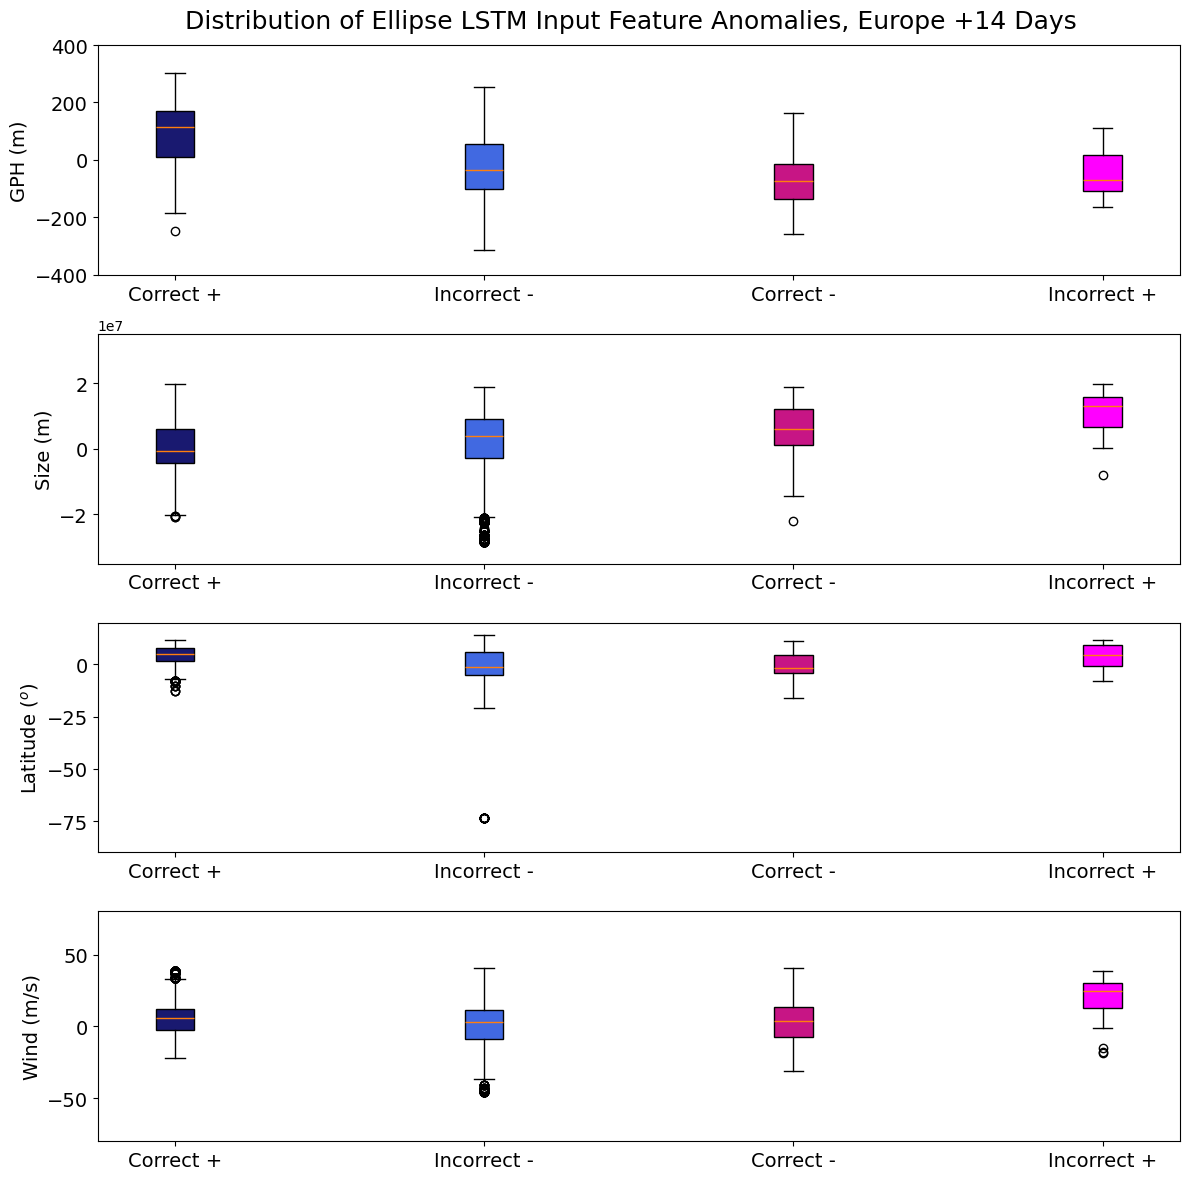

In [25]:
import matplotlib.ticker as mticker
myLocator = mticker.MultipleLocator(2)

#metrics = ["Wind (m/s)", "Ratio (m)", "Latitude ($^o$)", "Longitude ($^o$)", "Size (m$^2$)", "EPhi ($^o$)", "GPH (hPa)", "PV (m$^2$K/s kg)"]
metrics = ["GPH (m)", "Size (m)", "Latitude ($^o$)","Wind (m/s)"]
y1 = [-400,-35000000,-90,-80]
y2 = [400,35000000,20,80]
ticks = ['Correct +', 'Incorrect -', 'Correct -', 'Incorrect +'] #set tick numbers for dataset
ind = [2, 4, 6, 8]  # the x locations for the groups
w = 0.25 #box-plot width
c = ["midnightblue","royalblue","mediumvioletred","magenta"]
fs = 14

fig, axes = plt.subplots(4, 1, figsize=(12, 12))
plt.suptitle("Distribution of Ellipse LSTM Input Feature Anomalies, Europe +14 Days", fontsize = 18, x=0.53)
axes = axes.flatten()
for i in range(0,4):
    C_pos = pos[:,0,i]
    F_neg = Fneg[:,0,i]
    C_neg = neg[:,0,i]
    F_pos = Fpos[:,0,i]
        
    a1 =axes[i].boxplot([C_pos,F_neg,C_neg,F_pos], positions= [2,4,6,8], widths=w, patch_artist=True)
    for bplot in (a1,):
        for patch, color in zip(bplot['boxes'], c):
            patch.set_facecolor(color)
    axes[i].set_xticks(ind, ticks, fontsize = 14)
    axes[i].set_ylim((y1[i],y2[i]))
    axes[i].set_ylabel(str(metrics[i]), fontsize = 14)
    axes[i].tick_params(axis='both', labelsize=14)

plt.tight_layout()
plt.subplots_adjust(top=0.95)   
plt.savefig("EurRF_BOXPLOT_14days.png",bbox_inches = 'tight')
plt.show()